<a href="https://colab.research.google.com/github/Nanoth-T/Senior-Project/blob/main/Data/test-midi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install mingus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.0/140.0 kB 1.6 MB/s eta 0:00:00


In [8]:
!pip install midiutil

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for midiutil: filename=MIDIUtil-1.2.1-py3-none-any.whl size=54568 sha256=4c345ebb4a57b3dee9fe94108d8cee958b716130f1ab94b3565c54eaea07c9ba
  Stored in directory: /root/.cache/pip/wheels/af/43/4a/00b5e4f2fe5e2cd6e92b461995a3a97a2cebb30ab5783501b0
Successfully built midiutil


In [12]:
!pip install midi2audio
!pip install fluidsynth

  Preparing metadata (setup.py) ... done
  Created wheel for fluidsynth: filename=fluidsynth-0.2-py3-none-any.whl size=4487 sha256=10e590d2f5fdcafc13ec4ea62b87efb7e72f34af43d6e89a491611dfde7bb213
  Stored in directory: /root/.cache/pip/wheels/72/5a/bf/347b142f199fb1bea87f16f8970916226951bc359c947ba19b
Successfully built fluidsynth


In [1]:
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd

In [2]:
import scipy as sp

In [13]:
!sudo apt install -y fluidsynth

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libevdev2 libfluidsynth3 libgudev-1.0-0 libinput-bin
  libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a libqt5dbus5
  libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libxcb-util1 libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1
  libxkbcommon-x11-0 qsynth qt5-gtk-platformtheme qttranslations5-l10n
  timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs qt5-image-formats-plugins qtwayland5 jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libevdev2 libfluidsynth3 libgudev-1.0-0
  libinput-bin libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a
  libqt5dbus5 libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libx

In [125]:
import fluidsynth
!pip install midi2audio
from midi2audio import FluidSynth

In [129]:
import os
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd

In [25]:
from mingus.core import chords

result = chords.from_shorthand("Cmaj7")

print(result)

['C', 'E', 'G', 'B']


In [205]:
chords.from_shorthand("C#m7")

['C#', 'E', 'G#', 'B']

In [82]:
import random

In [198]:
from midiutil import MIDIFile
from mingus.core import chords

chord_progression = ["C#m7"]  #modify this to random note

NOTES = ['C', 'C#', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'Ab', 'A', 'Bb', 'B']
OCTAVES = list(range(11))
NOTES_IN_OCTAVE = len(NOTES)

errors = {
    'notes': 'Bad input, please refer this spec-\n'
}


def swap_accidentals(note):
    if note == 'Db':
        return 'C#'
    if note == 'D#':
        return 'Eb'
    if note == 'E#':
        return 'F'
    if note == 'Gb':
        return 'F#'
    if note == 'G#':
        return 'Ab'
    if note == 'A#':
        return 'Bb'
    if note == 'B#':
        return 'C'

    return note


def note_to_number(note: str, octave: int) -> int:
    note = swap_accidentals(note)
    assert note in NOTES, errors['notes']
    assert octave in OCTAVES, errors['notes']

    note = NOTES.index(note)
    note += (NOTES_IN_OCTAVE * octave)

    assert 0 <= note <= 127, errors['notes']

    return note


array_of_notes = []
for chord in chord_progression:
    array_of_notes.extend(chords.from_shorthand(chord))

array_of_note_numbers = []
for note in array_of_notes:
    OCTAVE = random.randint(1, 8)
    print(OCTAVE)
    array_of_note_numbers.append(note_to_number(note, OCTAVE))

track = 0
channel = 0
time = 1  # In beats
duration = 4  # In beats
tempo = 150  # In BPM #slow2fast
volume = 100  # 0-127, as per the MIDI standard

MyMIDI = MIDIFile(1)  # One track, defaults to format 1 (tempo track is created
# automatically)
MyMIDI.addTempo(track, time, tempo)

for i, pitch in enumerate(array_of_note_numbers):
    MyMIDI.addNote(track, channel, pitch, time + i*0.5, duration, volume) #modify time incress to make overlapped note

with open("sound.mid", "wb") as output_file:
    MyMIDI.writeFile(output_file)

2
6
4
1


In [199]:
fs = FluidSynth()

In [200]:
fs.midi_to_audio('/content/sound.mid', 'output.wav')

In [201]:
song, sr = librosa.load('/content/output.wav')
song

array([-2.2352147e-05, -2.5481670e-05, -2.1257702e-05, ...,
       -7.8681391e-03, -7.6813530e-03, -8.1109200e-03], dtype=float32)

In [202]:
sr

22050

In [203]:
ipd.Audio('/content/output.wav')

In [204]:
def plot_spectrogram(signal, name):
    """Compute power spectrogram with Short-Time Fourier Transform and plot result."""
    spectrogram = librosa.amplitude_to_db(librosa.stft(signal))
    plt.figure(figsize=(20, 15))
    librosa.display.specshow(spectrogram, y_axis="log")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Log-frequency power spectrogram for {name}")
    plt.xlabel("Time")
    plt.show()

<ipython-input-182-88976bb66d20>:3: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.amplitude_to_db(librosa.stft(signal))


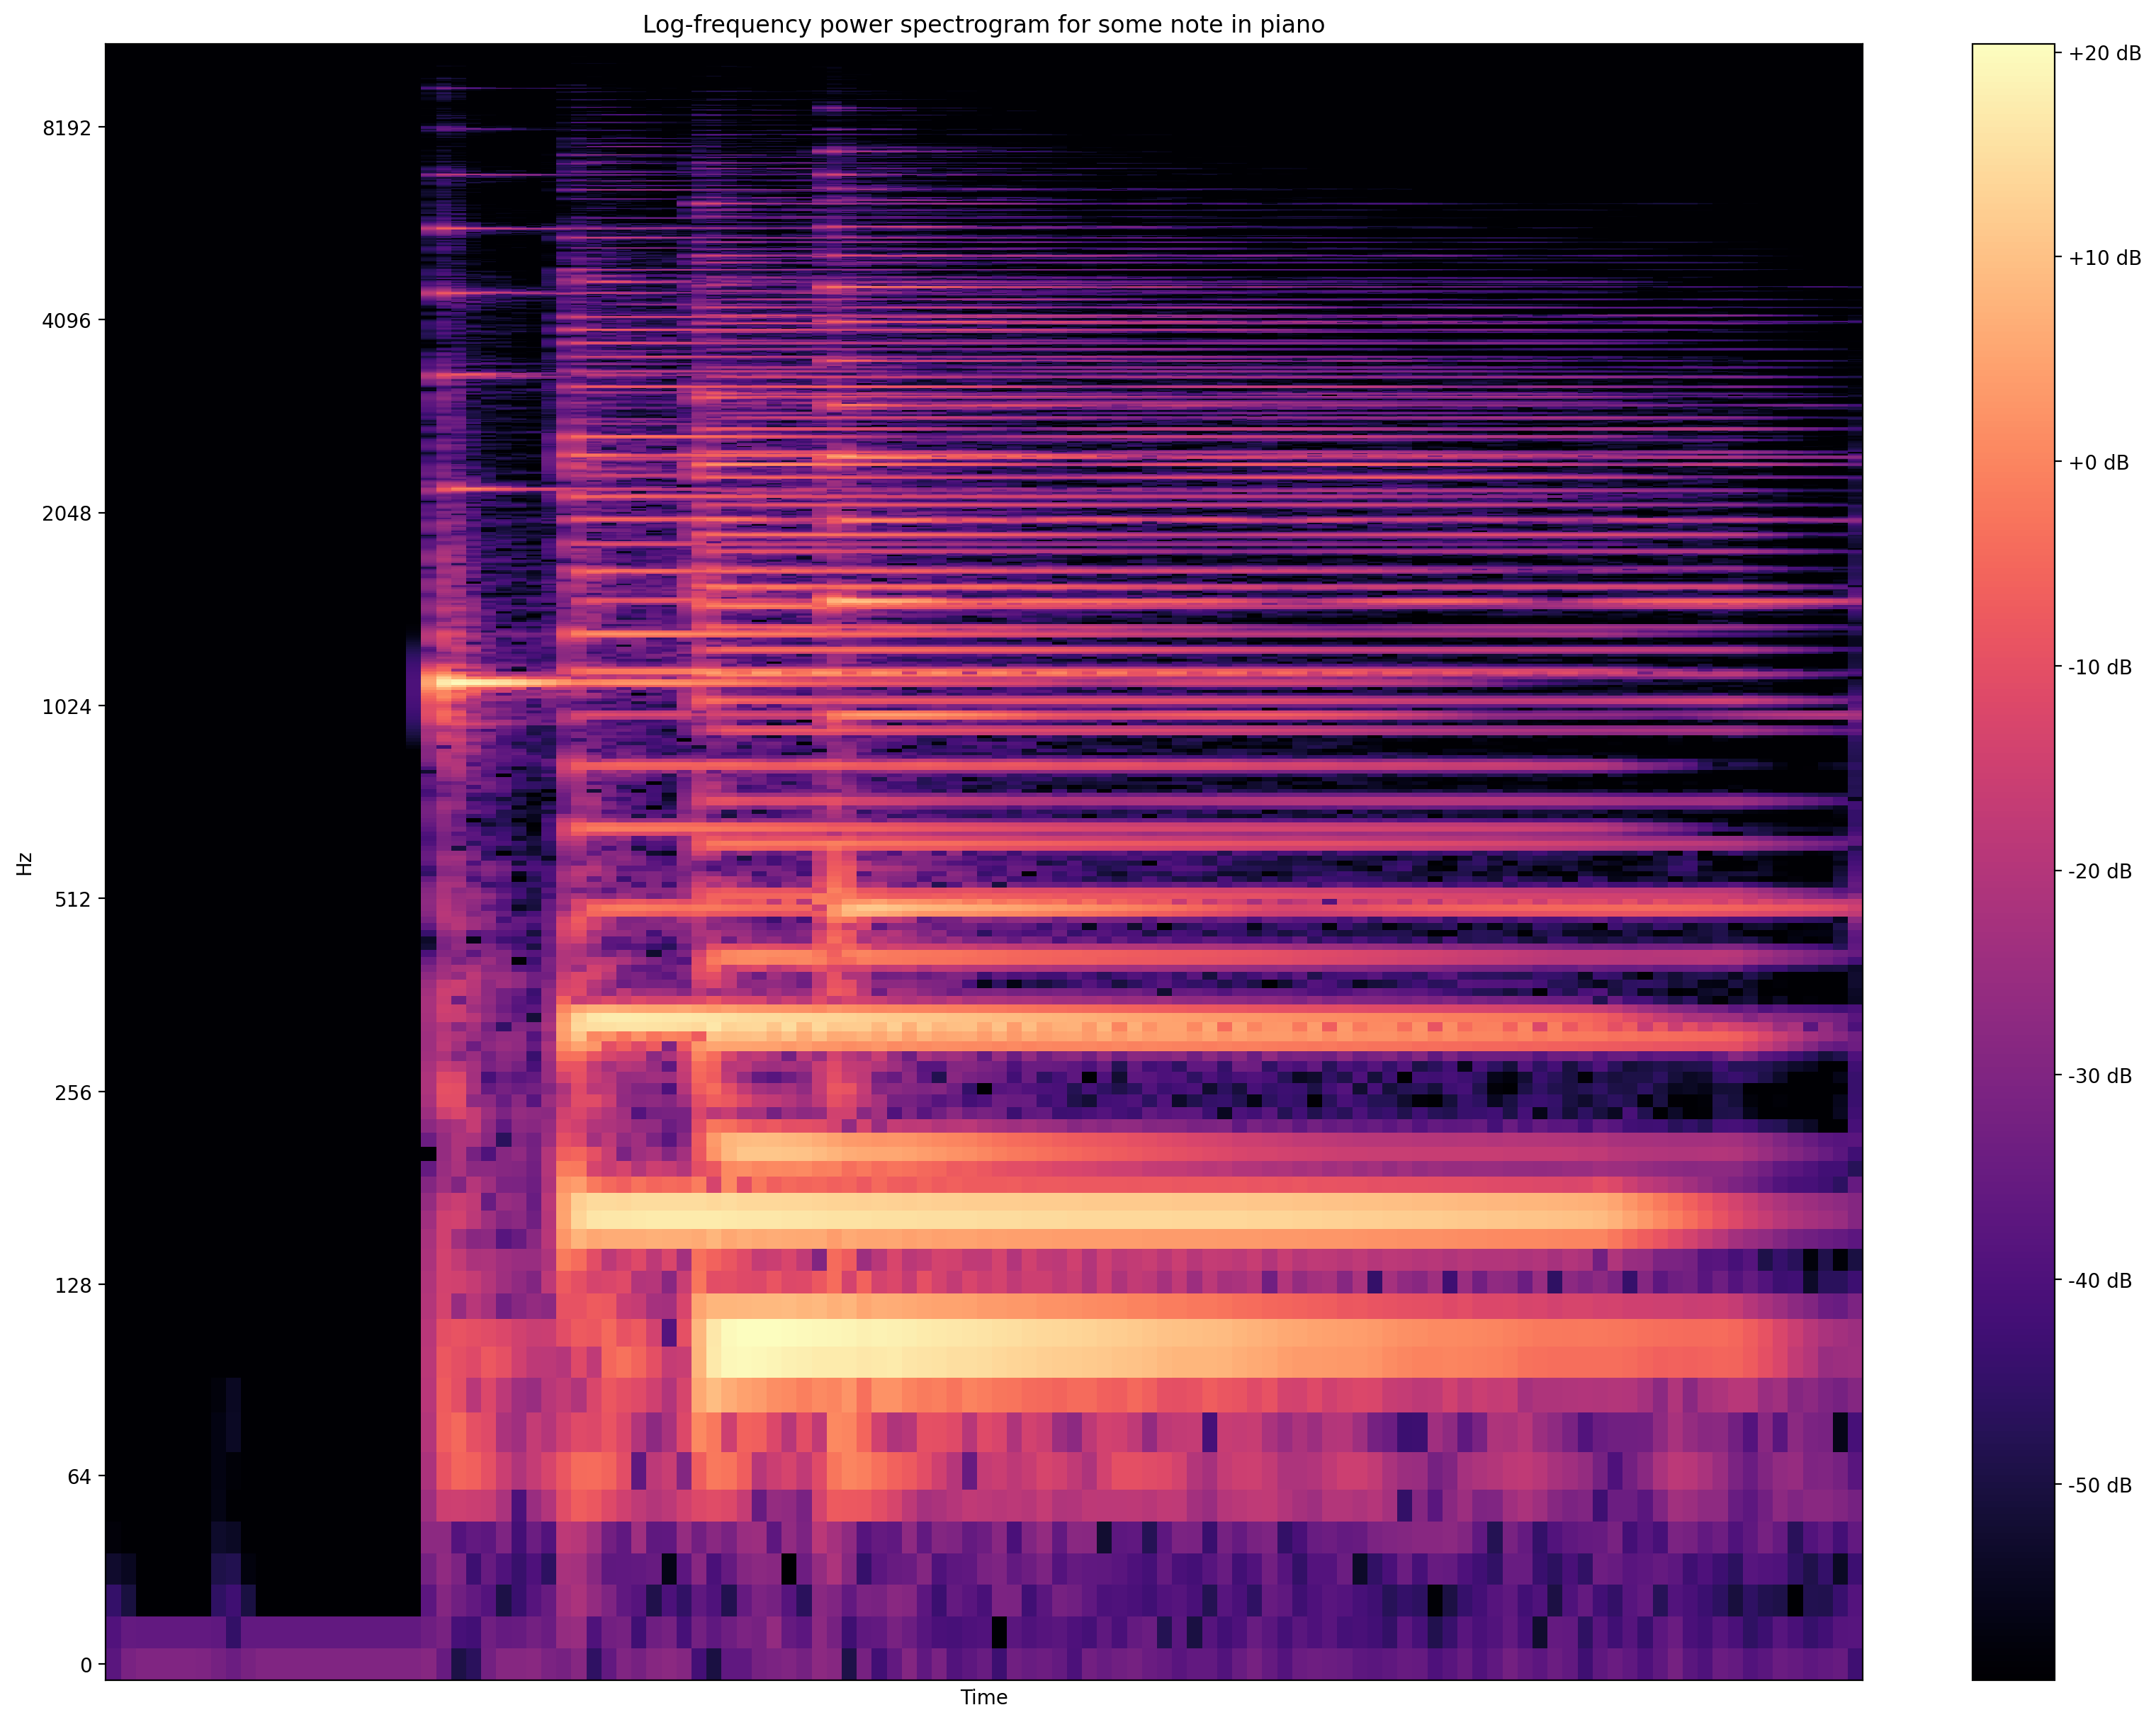

In [183]:
plot_spectrogram(song, "some note in piano")

In [184]:
import numpy as np

In [185]:
X = np.fft.fft(song)
X

array([-1.14020735e+00+0.j        , -4.61140100e-02+0.10831627j,
       -5.86228356e-02+0.07665985j, ..., -1.15189912e-04-0.1184973j ,
       -5.86228356e-02-0.07665985j, -4.61140100e-02-0.10831627j])

In [186]:
X_mag = np.absolute(X)
f = np.linspace(0, sr, len(X_mag))

Text(0.5, 0, 'Frequency (Hz)')

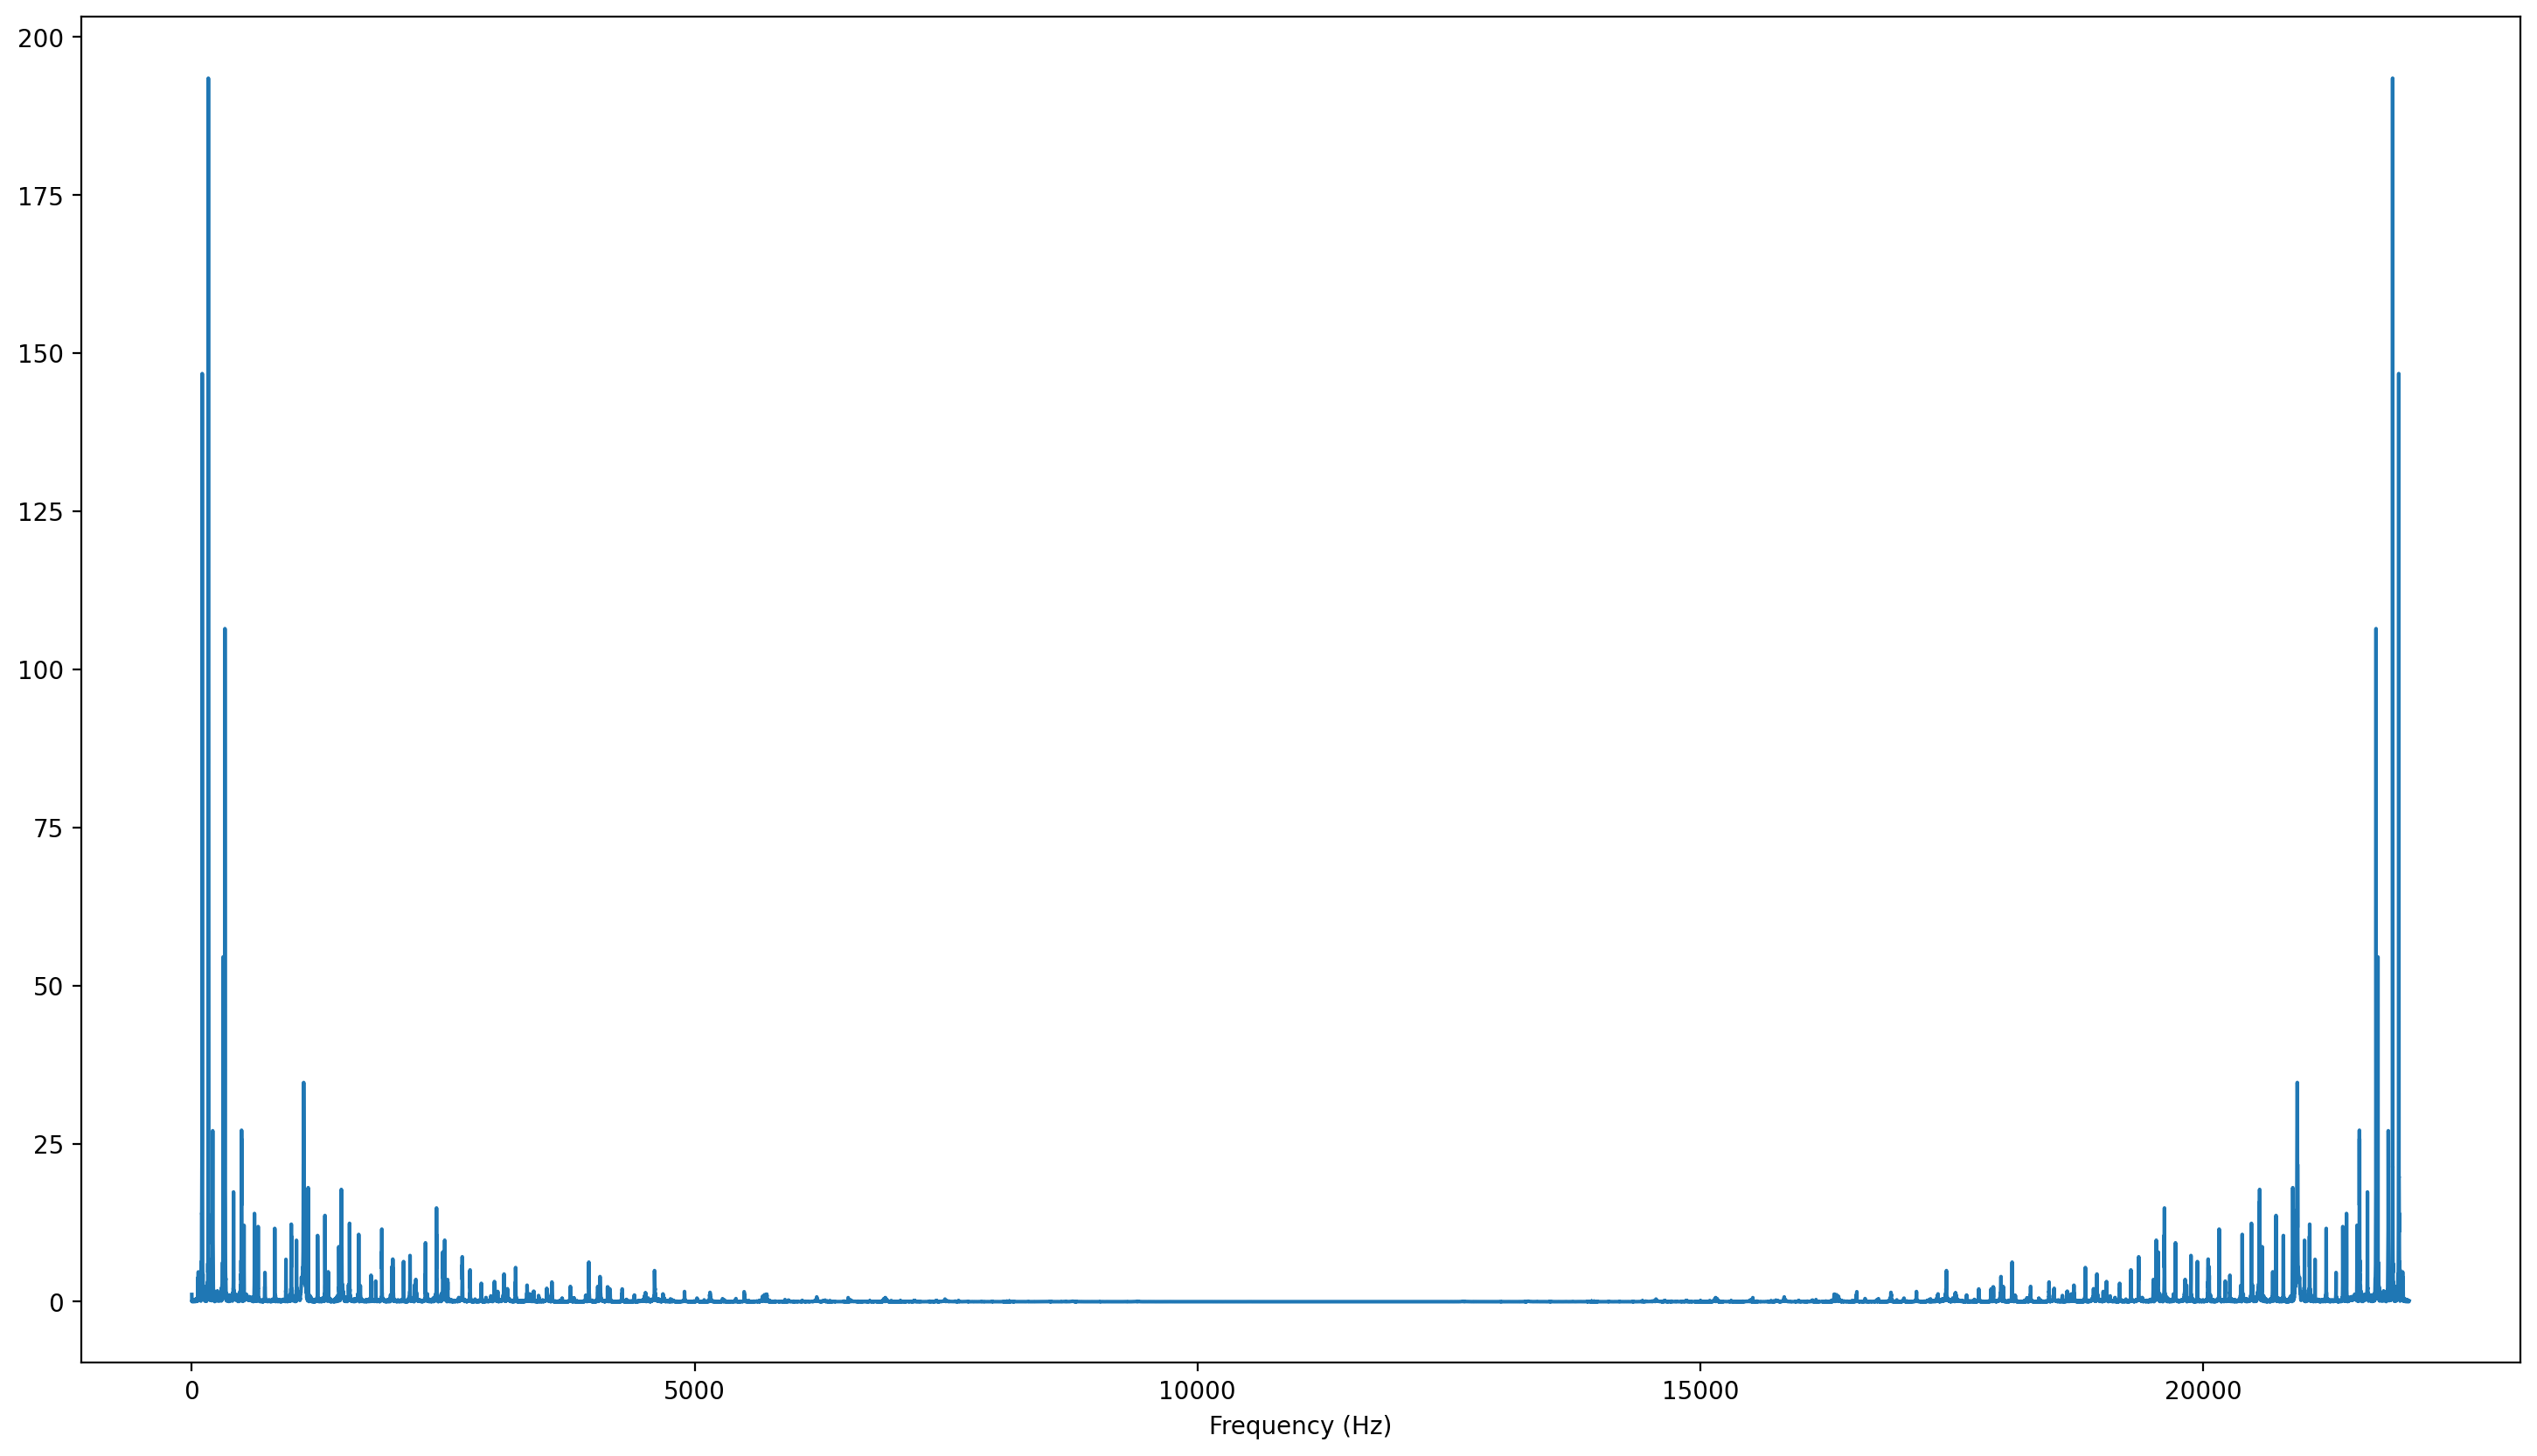

In [187]:
plt.figure(figsize=(18, 10))
plt.plot(f, X_mag) # magnitude spectrum
plt.xlabel('Frequency (Hz)')